# Методы оптимизации, Б05-921
## Практическое задание 1. Реализация метода Нелдера-Мида

Выполнил Тищенко Евегний

In [312]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

Ниже приведена реализация алгоритма:

In [313]:
def getIndices(func_val):
    sorted_id = np.argsort(func_val)
    return (sorted_id[-1], sorted_id[-2], sorted_id[0])

def GetDotsMaxDist(dots):
    s = (dots ** 2).sum(axis=1).reshape(-1, 1)
    res = s + s.T - 2 * (dots @ dots.T)
    return res.max()

def GetFuncMaxDist(val):
    return np.abs(val - val.reshape(-1, 1)).max()

def TerminateTest(dots, f_val):
    eps = 1e-5
    return GetDotsMaxDist(dots) < eps or GetFuncMaxDist(f_val) < eps


def NelderMeadMethon(func, x_0, dim=2, alpha=1, beta=0.5, gamma=2, delta=0.5):
    dots = np.concatenate(([x_0], 2 * np.identity(dim) + x_0), axis=0)
    values = func(dots)
    steps = 100
    opt_dots = [x_0]
    for _ in range(steps):
        h, s, l = getIndices(values)
        f_h, f_s, f_l = values[h], values[s], values[l]
        x_h, x_s, x_l = dots[h], dots[s], dots[l]
        c = (dots.sum(axis=0) - dots[h]) / dim
        x_r = (1 + alpha) * c - alpha * x_h
        f_r = func(np.array([x_r]))[0]
        if f_l <= f_r <= f_s:
            dots[h] = x_r
        elif f_r < f_l:
            x_e = gamma * x_r + (1 - gamma) * c
            f_e = func(np.array([x_e]))[0]
            if f_e < f_r:
                dots[h] = x_e
            else:
                dots[h] = x_r
        elif f_r >= f_s:
            if f_s <= f_r < f_h:
                x_c = (1 - beta) * c + beta * x_r
                f_c = func(np.array([x_c]))[0]
                if f_c <= f_r:
                    dots[h] = x_c
                else:
                    dots = x_l + (dots - x_l) * delta
                    dots[l] = x_l
            elif f_r >= f_h:
                x_c = (1 - beta) * c + beta * x_h
                f_c = func(np.array([x_c]))[0]
                if f_c < f_h:
                    dots[h] = x_c
                else:
                    dots = x_l + (dots - x_l) * delta
                    dots[l] = x_l
        values = func(dots)
        opt_id = np.argmin(values)
        opt_dots.append([dots[opt_id][0], dots[opt_id][1]])
        
        if TerminateTest(dots, values):
            break
    return np.array(opt_dots)

In [314]:
def func(dots):
    x = dots.T[0]
    y = dots.T[1]
    return np.sin(x) * (np.e ** ((1 - np.cos(x))**2)) + np.cos(x) * \
                                (np.e ** ((1 - np.sin(y))**2)) + (x - y) ** 2



size = 1000
x_grid = np.linspace(2, 11.5, size)
y_grid = np.linspace(3.5, 12, size)
x, y = np.meshgrid(x_grid, y_grid)
X = np.vstack([x.flatten(), y.flatten()]).T
val = func(X).reshape(size, -1)

start_pos = [[6., 6.], [8, 10], [8, 5], [3.1, 11]]
dots = []
for x_0 in start_pos:
    dots.append(NelderMeadMethon(func, x_0))


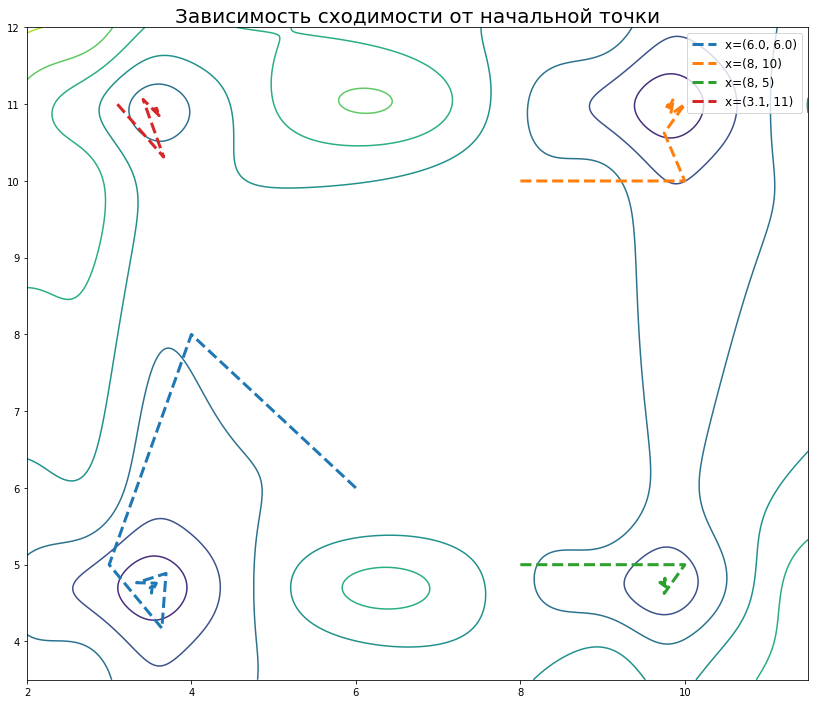

In [318]:
plt.figure(figsize=(14, 12))
plt.contour(x, y, val)
for i, single_d in enumerate(dots):
    plt.plot(single_d.T[0], single_d.T[1], lw=3, ls='--', 
             label="x=({}, {})".format(start_pos[i][0], start_pos[i][1]))
plt.legend(fontsize=12)
plt.title("Зависимость сходимости от начальной точки", fontsize=20)
plt.show()

Изучим зависимость поведения сходимости от различных значений параметров $\alpha, \beta, \gamma$:

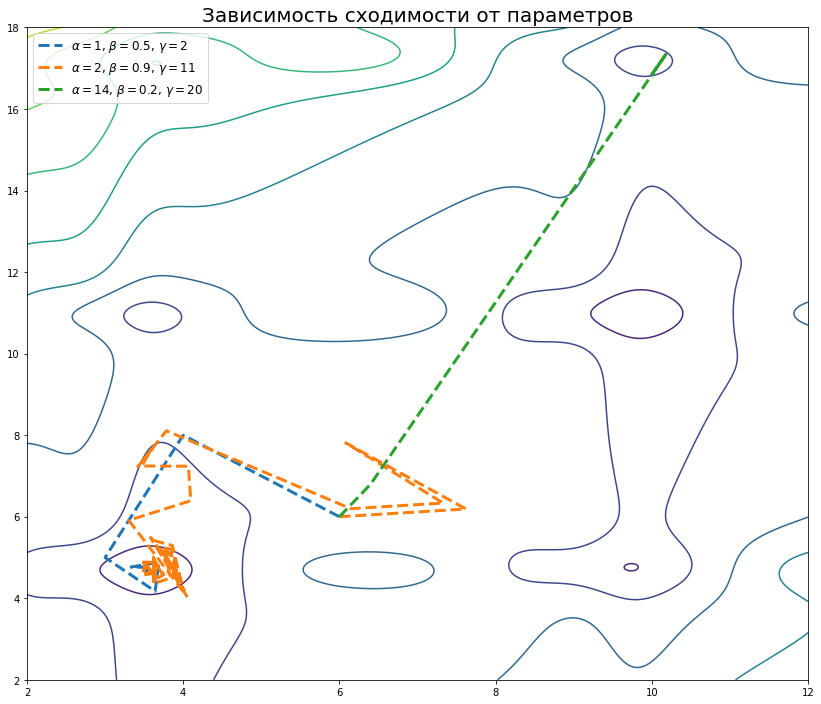

In [319]:
size = 1000
x_grid = np.linspace(2, 12, size)
y_grid = np.linspace(2, 18, size)
x, y = np.meshgrid(x_grid, y_grid)
X = np.vstack([x.flatten(), y.flatten()]).T
val = func(X).reshape(size, -1)

x_0 = [6., 6.]
start_params = [[1, 0.5, 2], [2, 0.9, 11], [14, 0.2, 20]]
dots = []
for params in start_params:
    dots.append(NelderMeadMethon(func, x_0, alpha=params[0], beta=params[1], gamma=params[2]))

plt.figure(figsize=(14, 12))
plt.contour(x, y, val)
for i, single_d in enumerate(dots):
    plt.plot(single_d.T[0], single_d.T[1], lw=3, ls='--', 
             label="$\\alpha=${}, $\\beta=${}, $\\gamma=${}".format(start_params[i][0], 
                                                         start_params[i][1],
                                                         start_params[i][2]))
plt.legend(fontsize=12)
plt.title("Зависимость сходимости от параметров", fontsize=20)
plt.show()

**Вывод:** как можно заметить, при изменении параметров меняется не только то, как сходимся к значению, но и к какому значению мы сходимся. Хотя синияя и оранжевая линии сходятся к одной и тоже же точке, их поведение различно (оранжевая сходится медленнее), при этом зеленая линяя сходится к абсолютно другой точке.